In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import datetime

# Data Exploration

Let's start by importing the data:

In [145]:
data = pd.read_csv("../data/eurlex/combined.csv", sep=",", quotechar="'")
data = data.astype({
    'form': 'category'
})

data['date'        ] = pd.to_datetime(data['date'        ])
data['oj_date'     ] = pd.to_datetime(data['oj_date'     ])
data['of_effect'   ] = pd.to_datetime(data['of_effect'   ])
data['end_validity'] = pd.to_datetime(data['end_validity'])

## Basic statistics

Number of documents:

In [146]:
len(data)

99903

Number of missing elements:

In [147]:
total = data.isnull().sum()
percent = data.isnull().sum()/data.isnull().count()*100.0
missing_data = pd.concat([total, percent], axis=1, keys=['Count', 'Percent'])
print(missing_data)

                     Count    Percent
celex                    0   0.000000
form                     0   0.000000
date                  1615   1.616568
title                    0   0.000000
oj_date               1971   1.972914
of_effect            14483  14.497062
end_validity         17398  17.414892
addressee            74951  75.023773
subject_matter       15400  15.414953
directory_codes      17310  17.326807
eurovoc_descriptors  20386  20.405794
legal_basis           6567   6.573376
relationships          869   0.869844
text                     0   0.000000


### form

In [148]:
data['form'].describe()

count          99903
unique            65
top       Regulation
freq           50078
Name: form, dtype: object

In [149]:
form_counting = data.groupby('form').size().sort_values(ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(form_counting)

form
Regulation                                   50078
Decision                                     15843
decision without addressee                   12981
decision with addressee                       4508
Directive                                     4157
Implementing regulation                       2337
Agreement                                     2091
Recommendation                                 764
Budget                                         762
Resolution                                     754
Implementing decision                          624
Opinion                                        615
Protocol                                       603
Communication                                  457
Decision - ECSC                                410
Joint Action                                   341
Notice                                         338
Common position                                283
Report                                         264
Rules of procedure        

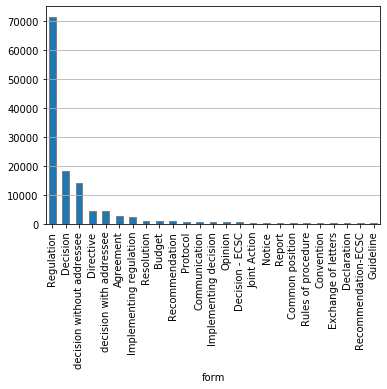

In [56]:
ax = form_counting[:][0:25].plot(kind='bar', edgecolor='grey', rot=90);
ax.yaxis.grid()

### date

In [151]:
data['date'].describe(datetime_is_numeric=True)

count                            98288
mean     1997-03-11 12:07:29.194204800
min                1949-09-24 00:00:00
25%                1988-12-21 00:00:00
50%                1999-01-05 12:00:00
75%                2005-11-11 00:00:00
max                2013-10-04 00:00:00
Name: date, dtype: object

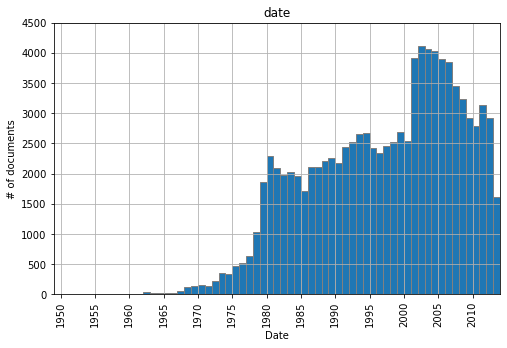

In [181]:
ax = data['date'].hist(bins=65, edgecolor='grey', range=(datetime.date(1949, 1, 1), datetime.date(2014, 1, 1)), figsize=(8,5))
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([datetime.date(1949, 1, 1), datetime.date(2014, 1, 1)])
ax.set_ylim([0, 4500])
plt.title('date')
plt.xlabel('Date')
plt.ylabel('# of documents')
plt.xticks(rotation=90)
plt.yticks(range(0, 4501, 500));

### title

In [153]:
data['title'].str.len().describe()

count    99903.000000
mean       216.309490
std         80.333845
min          6.000000
25%        161.000000
50%        206.000000
75%        255.000000
max       1531.000000
Name: title, dtype: float64

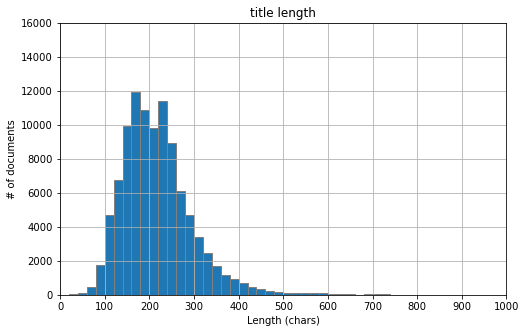

In [154]:
ax = data['title'].str.len().hist(bins=50, edgecolor='grey', range=(0, 1000), figsize=(8,5))
ax.set_xlim([0, 1000])
ax.set_ylim([0, 16000])
plt.title('title length')
plt.xlabel('Length (chars)')
plt.ylabel('# of documents')
plt.xticks(range(0, 1001, 100));

### oj_date

In [155]:
data['oj_date'].describe(datetime_is_numeric=True)

count                            97932
mean     1997-02-23 23:16:04.734714112
min                1952-12-30 00:00:00
25%                1988-12-30 00:00:00
50%                1998-12-09 00:00:00
75%                2005-10-13 00:00:00
max                2013-10-22 00:00:00
Name: oj_date, dtype: object

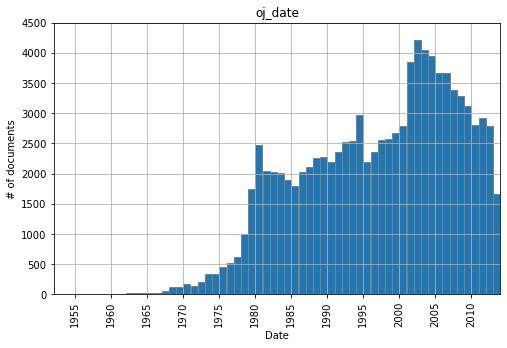

In [182]:
ax = data['oj_date'].hist(bins=62, edgecolor='grey', range=(datetime.date(1952, 1, 1), datetime.date(2014, 1, 1)), figsize=(8,5))
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([datetime.date(1952, 1, 1), datetime.date(2014, 1, 1)])
ax.set_ylim([0, 4500])
plt.title('oj_date')
plt.xlabel('Date')
plt.ylabel('# of documents')
plt.xticks(rotation=90)
plt.yticks(range(0, 4501, 500));

### of_effect

In [157]:
data['of_effect'].describe(datetime_is_numeric=True)

count                            85420
mean     1997-04-29 21:23:00.154530560
min                1953-01-01 00:00:00
25%                1989-04-14 00:00:00
50%                1998-11-24 00:00:00
75%                2005-11-14 00:00:00
max                2017-01-01 00:00:00
Name: of_effect, dtype: object

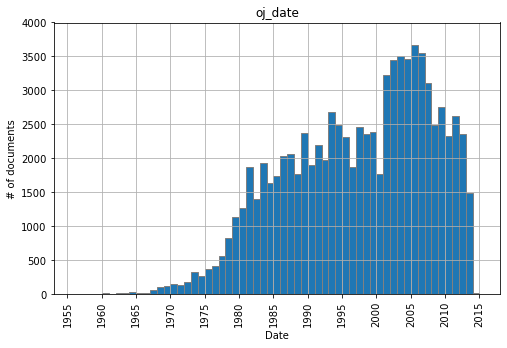

In [183]:
ax = data['of_effect'].hist(bins=65, edgecolor='grey', range=(datetime.date(1953, 1, 1), datetime.date(2018, 1, 1)), figsize=(8,5))
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([datetime.date(1953, 1, 1), datetime.date(2018, 1, 1)])
ax.set_ylim([0, 4000])
plt.title('oj_date')
plt.xlabel('Date')
plt.ylabel('# of documents')
plt.xticks(rotation=90)
plt.yticks(range(0, 4001, 500));

### end_validity

In [159]:
valid_end_validity = data[data['end_validity'] != pd.to_datetime("2100-01-01")]['end_validity']
valid_end_validity.describe(datetime_is_numeric=True)

count                            47672
mean     1995-04-09 18:06:29.662695040
min                1954-01-07 00:00:00
25%                1987-05-01 00:00:00
50%                1994-08-01 00:00:00
75%                2002-03-31 00:00:00
max                2058-12-31 00:00:00
Name: end_validity, dtype: object

In [160]:
invalid_end_validity = data[data['end_validity'] == pd.to_datetime("2100-01-01")]['end_validity']
invalid_end_validity.count()

34833

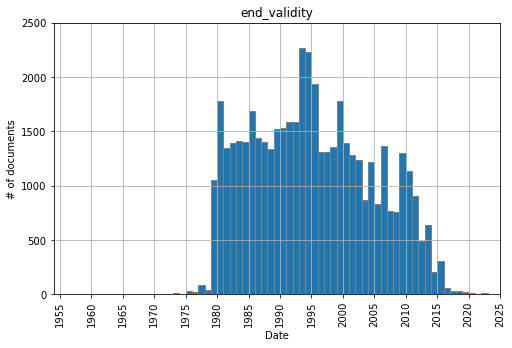

In [161]:
ax = valid_end_validity.hist(bins=104, edgecolor='grey', range=(datetime.date(1954, 1, 1), datetime.date(2058, 1, 1)), figsize=(8,5))
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([datetime.date(1954, 1, 1), datetime.date(2025, 1, 1)])
ax.set_ylim([0, 2500])
plt.title('end_validity')
plt.xlabel('Date')
plt.ylabel('# of documents')
plt.xticks(rotation=90)
plt.yticks(range(0, 2501, 500));

### addressee

In [162]:
data['addressee'].str.len().describe()

count    24952.000000
mean        26.261101
std         27.555964
min          5.000000
25%         17.000000
50%         17.000000
75%         27.000000
max        255.000000
Name: addressee, dtype: float64

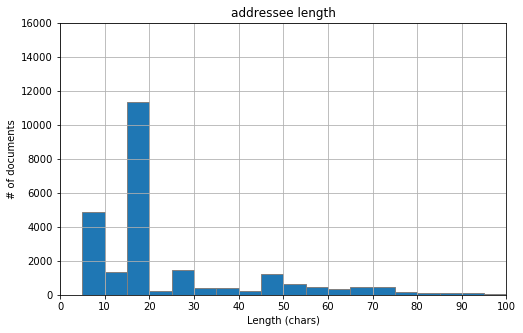

In [163]:
ax = data['addressee'].str.len().hist(bins=30, edgecolor='grey', range=(0, 150), figsize=(8,5))
ax.set_xlim([0, 100])
ax.set_ylim([0, 16000])
plt.title('addressee length')
plt.xlabel('Length (chars)')
plt.ylabel('# of documents')
plt.xticks(range(0, 101, 10));

## subject_matter

In [164]:
data['subject_matter'].describe()

count                                                 84503
unique                                                 5601
top       Competition;Rules applying to undertakings - c...
freq                                                   4766
Name: subject_matter, dtype: object

In [165]:
# Group in a single list all keywords
keywords = []
for element in data['subject_matter']:
    if (type(element) == float):
        keywords.append('NaN')
    else:
        for sub_element in element.split(";"): # keywords related to a single entry are separated by ";"
            keywords.append(sub_element)
        
print("Total Keywords: {}".format(len(keywords)))

Total Keywords: 187899


In [166]:
# Get unique keywords and respective frequency
unique_keywords, count = np.unique(keywords,return_counts=True)
count_sort_ind = np.argsort(-count)

print("Unique Keywords: {}".format(len(unique_keywords)))
print("(Excluding NaN) Most frequently used keyword: {} | {} times".format(unique_keywords[count_sort_ind][1], count[count_sort_ind][1]))

Unique Keywords: 249
(Excluding NaN) Most frequently used keyword: common commercial policy | 11961 times


In [167]:
lower_bound = 1 # starting at 1 to skip NaN (because NaN is the most common)
upper_bound = 26

In [168]:
sub_unique_keywords = unique_keywords[count_sort_ind][lower_bound:upper_bound]

In [169]:
sub_count = count[count_sort_ind][lower_bound:upper_bound]

In [170]:
subject_matter_df = pd.DataFrame({'Keywords' : sub_unique_keywords, 'Frequency' : sub_count})
print(subject_matter_df)

                                             Keywords  Frequency
0                            common commercial policy      11961
1                                  External relations      10478
2                                         Agriculture       8943
3                                         Competition       6749
4                              Veterinary legislation       5653
5                                    Fisheries policy       5396
6     Rules applying to undertakings - concentrations       4786
7                               Approximation of laws       4727
8                                     Internal market       3830
9                                    CCT: derogations       3526
10                                        Association       3371
11              Provisions governing the Institutions       3112
12                                      Milk products       2960
13  European Agricultural Guidance and Guarantee F...       2951
14                       

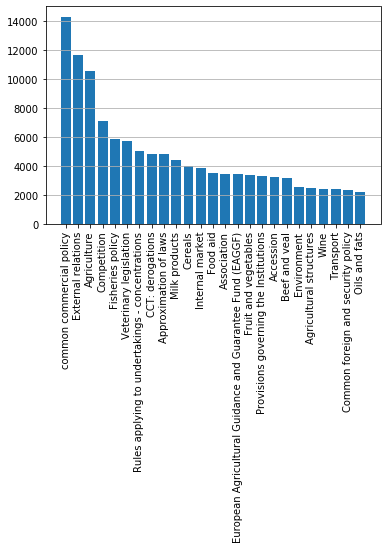

In [57]:
ticks = range(len(sub_count))
plt.bar(ticks, sub_count, align='center')
plt.xticks(ticks, sub_unique_keywords, rotation='vertical')
plt.grid(axis='y')
plt.show()

### eurovoc_descriptors

In [172]:
data['eurovoc_descriptors'].describe()

count                                                 79517
unique                                                52294
top       agri-monetary policy;citrus fruit;fruit vegeta...
freq                                                    460
Name: eurovoc_descriptors, dtype: object

In [173]:
# Group in a single list all keywords
eurovoc_descriptors = []
NaN_counter = 0
for element in data['eurovoc_descriptors']:
    if (type(element) == float):
        NaN_counter += 1
        eurovoc_descriptors.append('NaN')
    else:
        for sub_element in element.split(";"): # keywords related to a single entry are separated by ";"
            eurovoc_descriptors.append(sub_element)
        
print("Total eurovoc descriptors: {}".format(len(eurovoc_descriptors)))
print("Total NaN values: {}".format(NaN_counter))

Total eurovoc descriptors: 445434
Total NaN values: 20386


In [174]:
# Get unique keywords and respective frequency
unique_eurovoc_descriptors, eurovoc_descriptors_count = np.unique(eurovoc_descriptors,return_counts=True)
eurovoc_descriptors_count_sort_ind = np.argsort(-eurovoc_descriptors_count)

print("Unique eurovoc descriptors: {}".format(len(unique_eurovoc_descriptors)))
print("(Excluding NaN) Most frequently used eurovoc descriptor: {} | {} times".format(unique_eurovoc_descriptors[eurovoc_descriptors_count_sort_ind][1], eurovoc_descriptors_count[eurovoc_descriptors_count_sort_ind][1]))

Unique eurovoc descriptors: 5204
(Excluding NaN) Most frequently used eurovoc descriptor: import | 5871 times


In [175]:
lower_bound_ = 1
upper_bound_ = 25
sub_unique_eurovoc_descriptors = unique_eurovoc_descriptors[eurovoc_descriptors_count_sort_ind][lower_bound_:upper_bound_]
sub_eurovoc_descriptors_count = eurovoc_descriptors_count[eurovoc_descriptors_count_sort_ind][lower_bound_:upper_bound_]

In [176]:
eurovoc_descriptors_df = pd.DataFrame({'Eurovoc Descriptors' : sub_unique_eurovoc_descriptors, 'Frequency' : sub_eurovoc_descriptors_count})
print(eurovoc_descriptors_df)

               Eurovoc Descriptors  Frequency
0                           import       5871
1                    export refund       4785
2              originating product       3837
3                award of contract       3794
4                     citrus fruit       3401
5                        pip fruit       3388
6                  fruit vegetable       3386
7                     tariff quota       3361
8                     import price       3352
9                    third country       3319
10                  import licence       3007
11                    EC agreement       2914
12                  health control       2576
13                      CCT duties       2259
14                           Spain       2023
15                       State aid       1918
16           veterinary inspection       1870
17                 EU Member State       1847
18                       marketing       1837
19  common organisation of markets       1814
20            agri-monetary policy

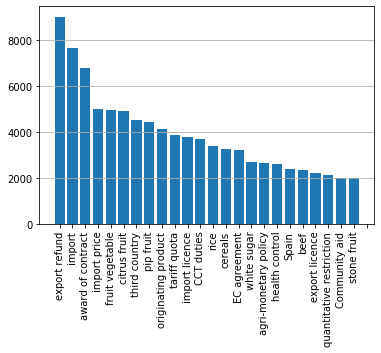

In [58]:
ticks_ = range(len(sub_eurovoc_descriptors_count))
plt.bar(ticks_, sub_eurovoc_descriptors_count, align='center')
plt.xticks(ticks, sub_unique_eurovoc_descriptors, rotation='vertical')
plt.grid(axis='y')
plt.show()

## relationships

In [61]:
# Group in a single list all relationships
relationships = []

for element in data['relationships']:
    if (type(element) == float):
        continue
    else:
        for sub_element in element.split(";"): # relationships are separated by ";"
            relationships.append(sub_element)
        
print("Total relationships: {}".format(len(relationships)))
print("Relationships per document: {}".format(len(relationships)/len(data)))

Total relationships: 749950
Relationships per document: 5.929771016509583


In [62]:
# Get unique keywords and respective frequency
unique_relationships, relationships_count = np.unique(relationships,return_counts=True)
relationships_count_sort_ind = np.argsort(-relationships_count)

print("Unique relationships: {}".format(len(unique_relationships)))
print("Most frequently used relationships: {} | {} times".format(unique_relationships[relationships_count_sort_ind][0], relationships_count[relationships_count_sort_ind][0]))

Unique relationships: 128569
Most frequently used relationships: 11957E113 | 5637 times


In [63]:
sub_unique_relationships = unique_relationships[relationships_count_sort_ind][0:25]
sub_relationships_count = relationships_count[relationships_count_sort_ind][0:25]

In [64]:
relationships_df = pd.DataFrame({'Relationships' : sub_unique_relationships, 'Frequency' : sub_relationships_count})
print(relationships_df)

     Relationships  Frequency
0        11957E113       5637
1       31992R1766       5018
2       32007R1234       4461
3       31968R0804       4405
4   21994A0103(01)       4275
5       31994R3223       3230
6       31993R2454       3153
7        11957E043       2824
8       31968R0805       2710
9       32004R0139       2597
10      31989R4064       2574
11      31992R3813       2536
12      31981R1785       2517
13      31975R2727       2394
14  21994A0103(51)       2330
15  21994A0103(52)       2300
16      31995R3072       2203
17      31966R0136       1979
18      31995R1501       1975
19      31999R1255       1766
20      31972R1035       1689
21      31972L0462       1577
22      32002R1605       1567
23      32001R1260       1434
24       11992E228       1426


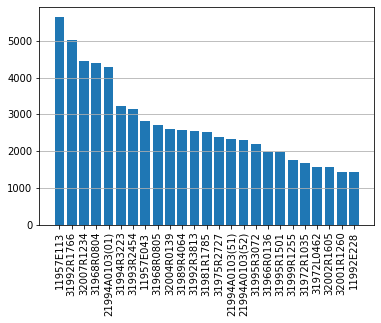

In [65]:
ticks_ = range(len(sub_relationships_count))
plt.bar(ticks_, sub_relationships_count, align='center')
plt.xticks(ticks, sub_unique_relationships, rotation='vertical')
plt.grid(axis='y')
plt.show()

## text

In [178]:
data['text'].str.len().describe().apply(lambda x: format(x, 'f'))

count      99903.000000
mean       15288.323504
std        80800.778274
min          300.000000
25%         2922.000000
50%         4459.000000
75%        10099.000000
max      6305034.000000
Name: text, dtype: object

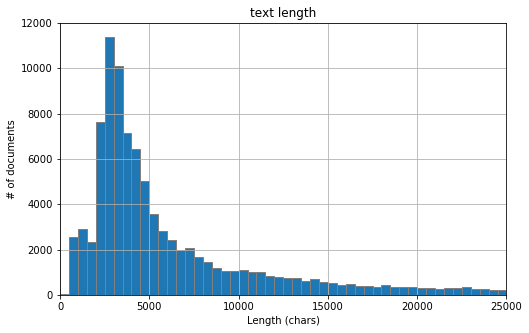

In [179]:
ax = data['text'].str.len().hist(bins=50, edgecolor='grey', range=(0, 25000), figsize=(8,5))
ax.set_xlim([0, 25000])
ax.set_ylim([0, 12000])
plt.title('text length')
plt.xlabel('Length (chars)')
plt.ylabel('# of documents')
plt.xticks(range(0, 25001, 5000));